In [1]:
import pandas as pd

growth_ind = pd.read_csv('10 indexed data.csv')
G1 = growth_ind[['LEAF_LNGTH', 'LEAF_CNT']]

In [15]:
G1

,LEAF_LNGTH,LEAF_CNT,cluster
0,10.15,6.50,0
1,10.15,6.50,0
2,10.15,6.50,0
3,10.15,6.50,0
4,10.15,6.50,0
...,...,...,...
176,9.47,6.38,1
177,9.20,5.50,8
178,9.20,5.50,8
179,9.20,5.50,8


In [16]:
from sklearn.preprocessing import StandardScaler

scaled_G1_data = StandardScaler().fit_transform(G1)
scaled_G1 = pd.DataFrame(scaled_G1_data, columns = G1.columns)

In [84]:
from sklearn.cluster import DBSCAN

# epsilon, 최소 샘플 개수 설정
model1 = DBSCAN(eps=0.8, min_samples=10)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
model1.fit(scaled_G1_data)
scaled_G1['cluster'] = model1.fit_predict(scaled_G1_data)

In [85]:
scaled_G1

,LEAF_LNGTH,LEAF_CNT,cluster
0,0.450667,-1.113956,0
1,0.450667,-1.113956,0
2,0.450667,-1.113956,0
3,0.450667,-1.113956,0
4,0.450667,-1.113956,0
...,...,...,...
176,-0.225608,-1.173952,0
177,-0.494130,-1.613921,4
178,-0.494130,-1.613921,4
179,-0.494130,-1.613921,4


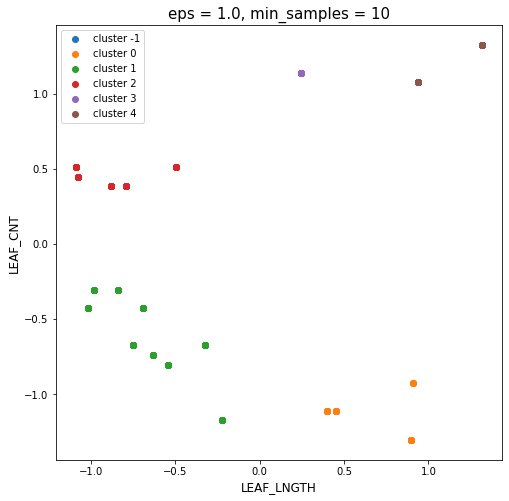

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, scaled_G1['cluster'].max() + 1):
    plt.scatter(scaled_G1.loc[G1['cluster'] == i, 'LEAF_LNGTH'], 
                scaled_G1.loc[G1['cluster'] == i, 'LEAF_CNT'], label = 'cluster ' + str(i))

plt.legend()
plt.title('eps = 1.0, min_samples = 10', size = 15)
plt.xlabel('LEAF_LNGTH', size = 12)
plt.ylabel('LEAF_CNT', size = 12)
plt.show()